In [2]:
%load_ext autoreload
%autoreload 2
import datajoint as dj
dj.conn().connect()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pipeline.ingest import behavior as behavior_ingest
from pipeline.ingest import ephys as ephys_ingest
from pipeline import lab, get_schema_name, experiment, foraging_analysis, report, ephys, histology, psth_foraging, ccf
import pipeline.shell as shell
from pipeline import psth_foraging, foraging_model, foraging_analysis
from pipeline.plot import unit_psth

shell.logsetup('INFO')
[hh for hh in dj.list_schemas() if 'hanhou' in hh]

from pipeline.psth_foraging import compute_unit_period_activity
from pipeline.plot.foraging_model_plot import plot_session_fitted_choice
from pipeline.plot.unit_psth import plot_unit_period_tuning

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Unit PSTH

## Previous pipeline

First, make sure the `psth_foraging.TrialCondition` have the correct conditions. <br> Note that I separate foraging ephys analysis to another new schema `psth_foraging`.

In [ ]:
from pipeline import psth_foraging

In [ ]:
psth_foraging.TrialCondition()

In [ ]:
psth_foraging.TrialCondition.get_trials('foraging_L_hit_noearlylick').fetch(format='frame', limit=10)

Here I need to run `foraging_populate.py` to do parallel population of `psth_foraging.UnitPsth`

Check progress of populating PSTH

In [ ]:
schema = dj.schema(get_schema_name('psth_foraging'))
schema.jobs

In [ ]:
schema.jobs.fetch('key')

In [ ]:
length = len(psth_foraging.UnitPsth())
ratio = length / len(psth_foraging.UnitPsth.key_source)
print(f'ephys.Unit:{length}, {ratio:.2%}')

In [ ]:
schema.jobs.delete()

In [ ]:
dj.kill()

After populating PSTH (with some bug fixes), single unit PSTH can be plotted

In [ ]:
experiment.Session & 'session_date = "2021-04-29"'

In [ ]:
from pipeline.plot import unit_psth

In [ ]:
unit = (ephys.Unit() & (experiment.Session & 'session_date = "2021-04-29"') & 'insertion_number=1' & 'unit_uid=299').fetch1("KEY")
_ = unit_psth.plot_unit_psth_foraging(unit)

## New flexible PSTHs

In [4]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() & (experiment.Session & 'session_date = "2021-04-18"' & 'subject_id = 473361') & {'insertion_number': imec + 1, 'unit_uid': unit}).fetch1("KEY")

### PSTH grouped by choice and outcome

In [8]:
align_types=['trial_start', 'go_cue', 'first_lick_after_go_cue', 'iti_start', 'next_trial_start']

In [14]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

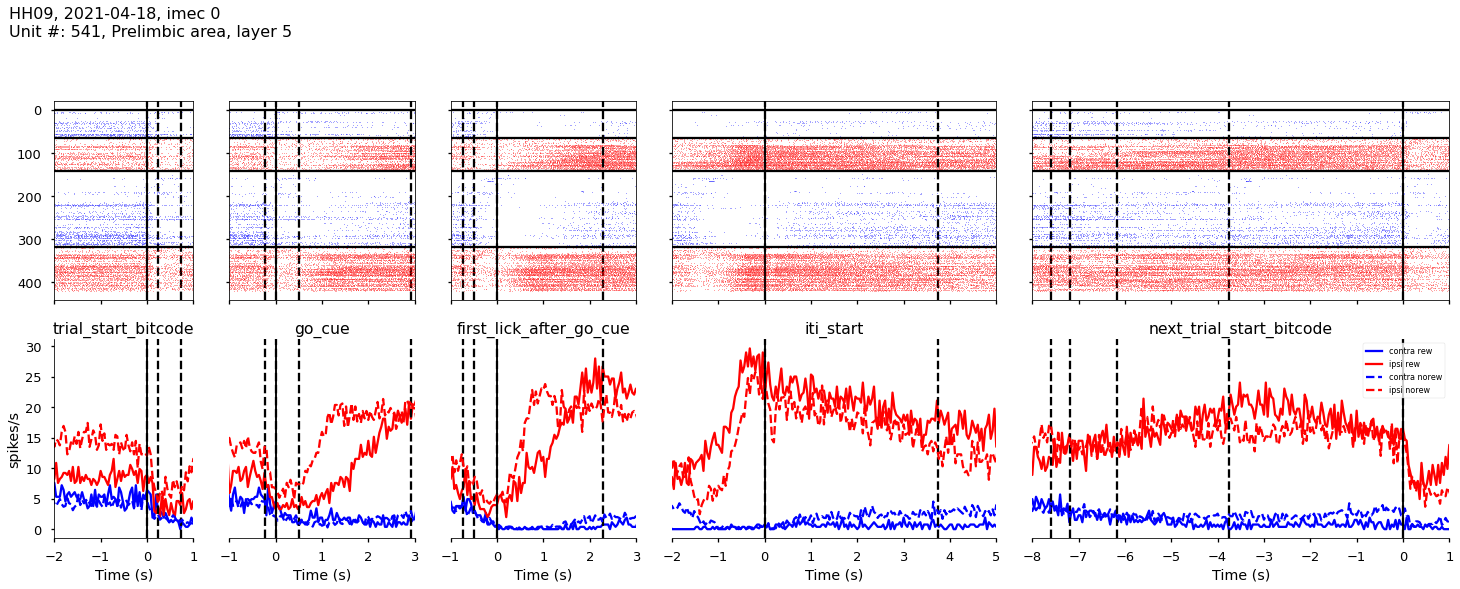

In [15]:
_ = unit_psth.plot_unit_psth_choice_outcome(unit_key, align_types)

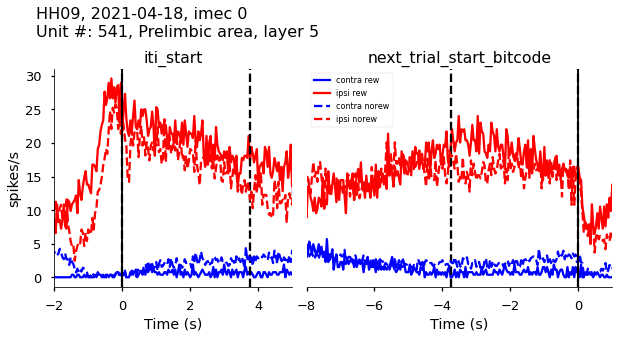

In [16]:
_ = unit_psth.plot_unit_psth_choice_outcome(unit_key, align_types=['iti_start', 'next_trial_start'], if_raster=False)

### PSTH grouped by value quantiles

In [17]:
best_model = (foraging_model.FittedSessionModelComparison.BestModel & unit_key & 'model_comparison_idx = 1').fetch1('best_aic')
print(best_model)

16


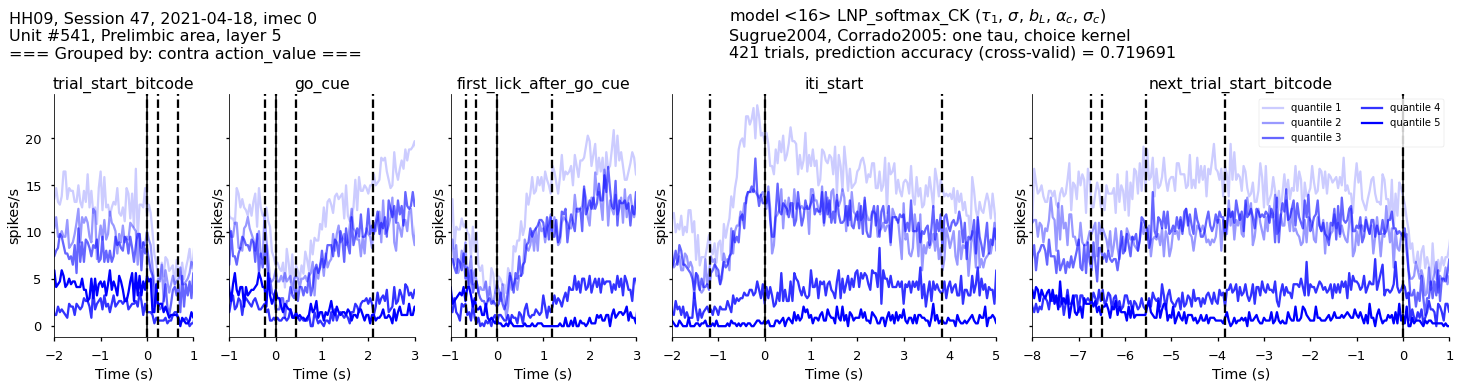

In [18]:
align_types=['trial_start', 'go_cue', 'first_lick_after_go_cue', 'iti_start', 'next_trial_start']
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=best_model, align_types=align_types, latent_variable='contra_action_value')

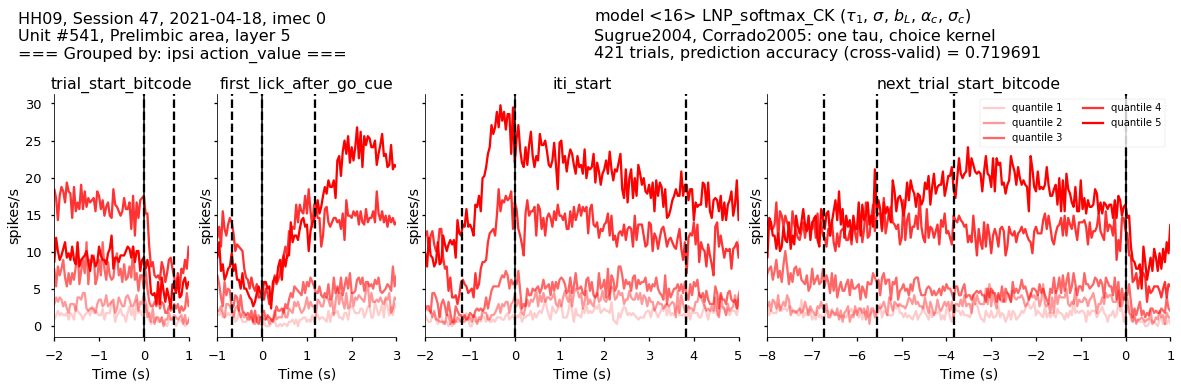

In [19]:
align_types=['trial_start', 'first_lick_after_go_cue', 'iti_start', 'next_trial_start']
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=best_model, align_types=align_types, latent_variable='ipsi_action_value')

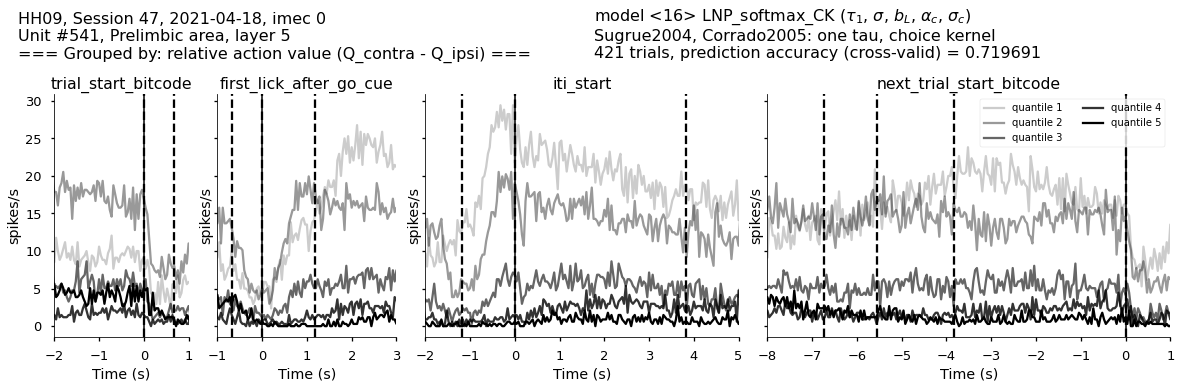

In [20]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=best_model, align_types=align_types, latent_variable='relative_action_value_ic')

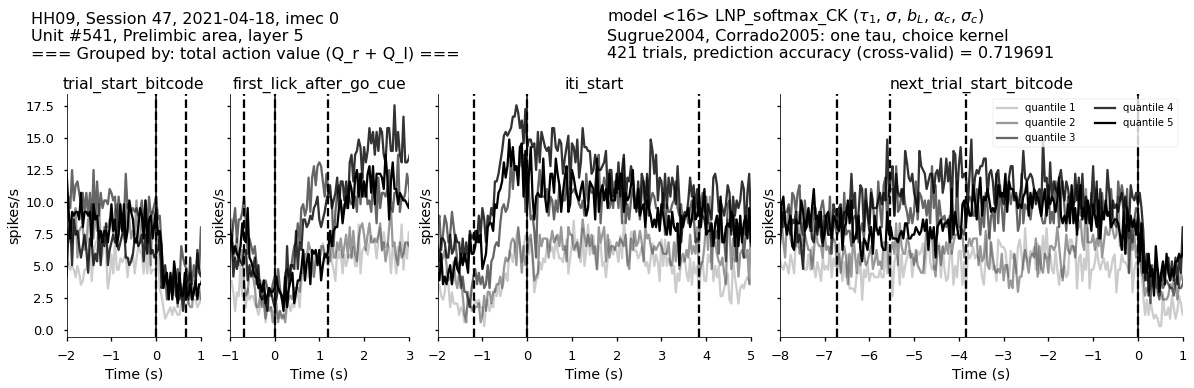

In [21]:
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=best_model, align_types=align_types, latent_variable='total_action_value')

### More example neurons

####  PL

In [ ]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=5)

In [ ]:
date, imec, unit = '2021-04-18', 0, 484
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

#### ALM

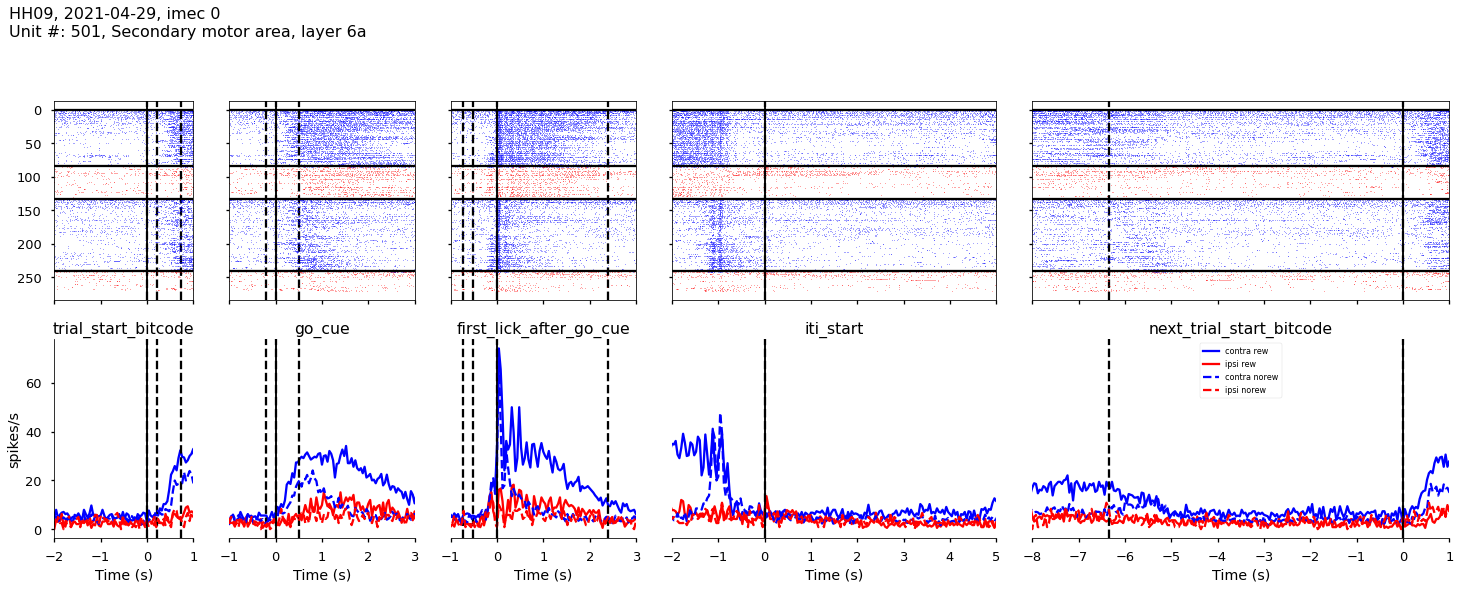

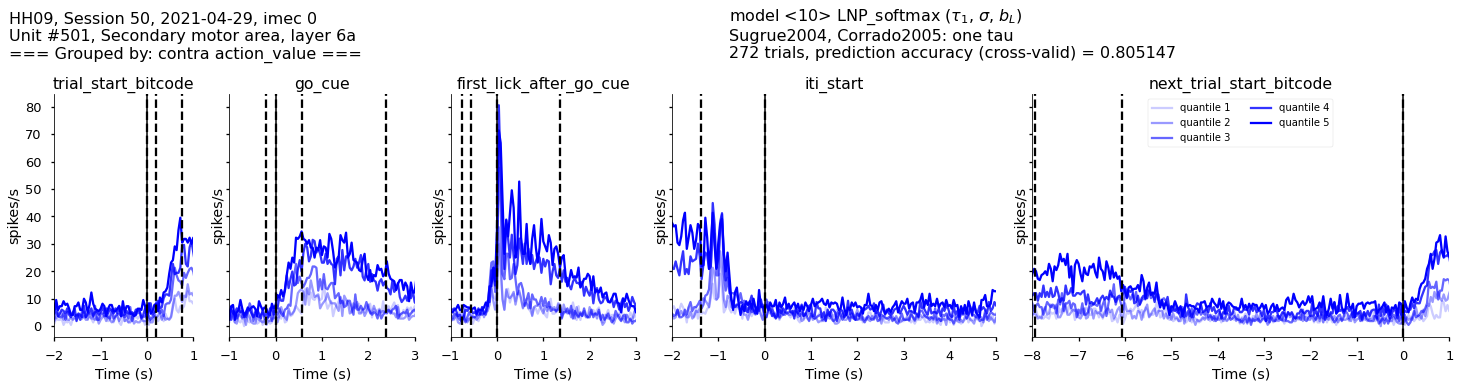

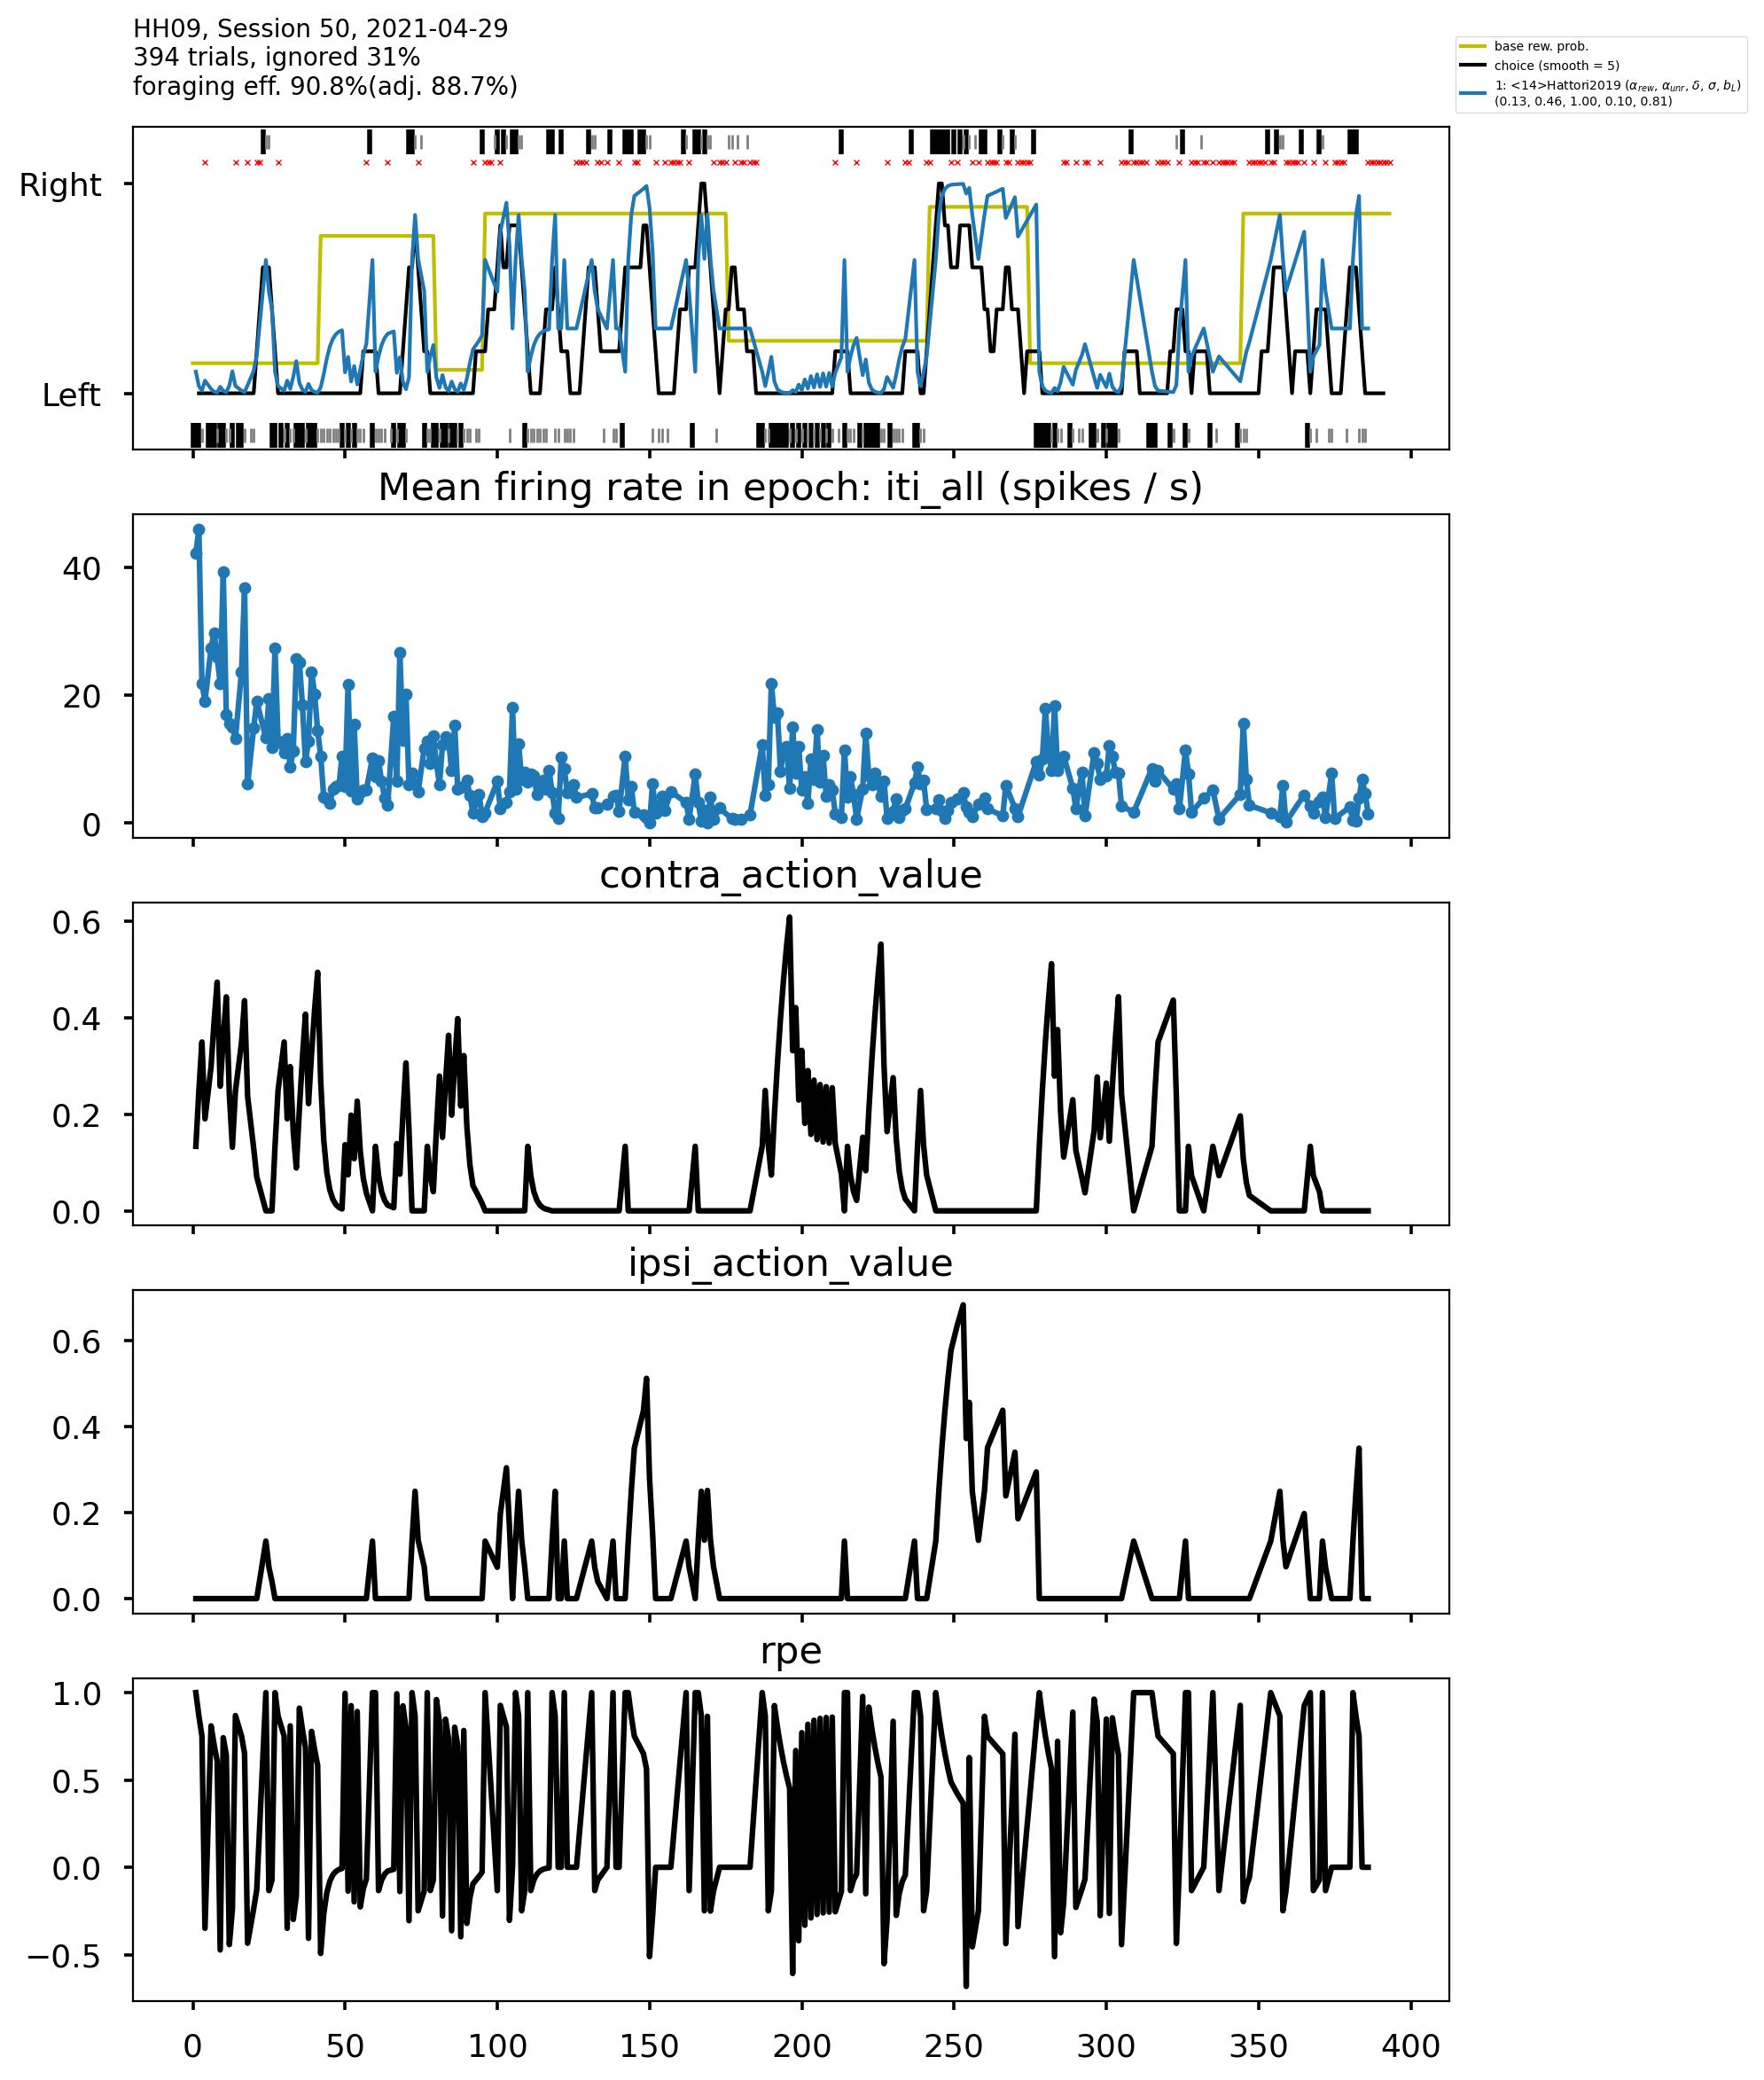

<Figure size 1600x600 with 0 Axes>

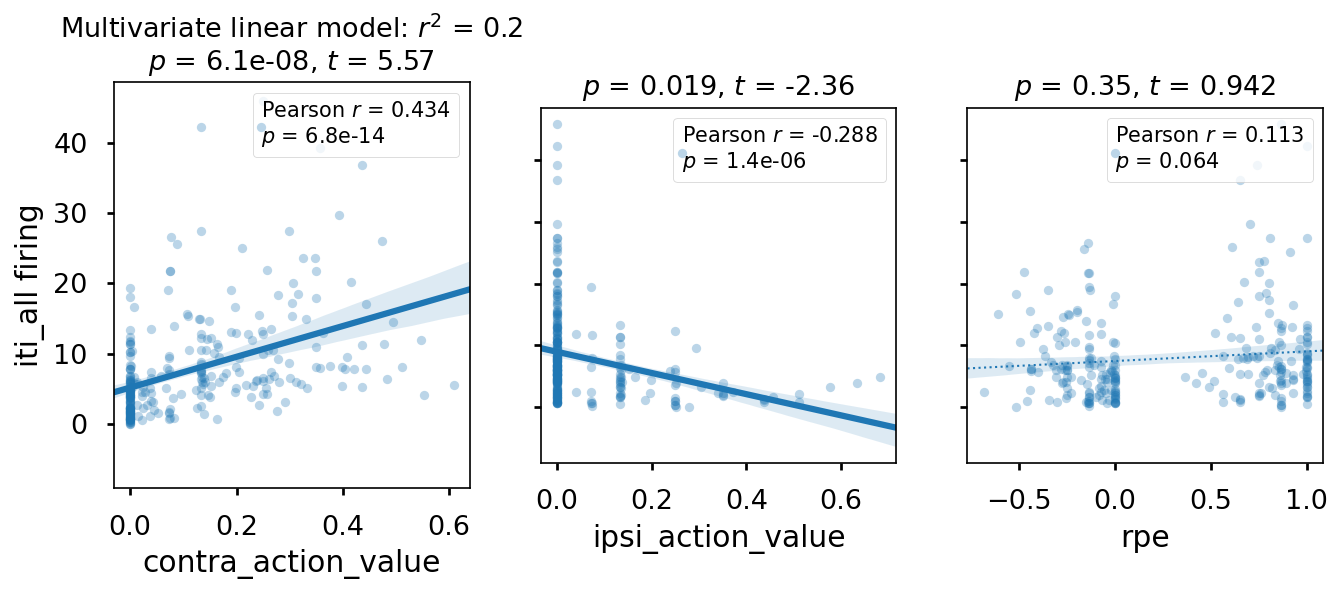

In [5]:
date, imec, unit = '2021-04-29', 0, 501
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)
_ = plot_unit_period_tuning(unit_key)

In [ ]:
date, imec, unit = '2021-04-16', 0, 978
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

In [ ]:
date, imec, unit = '2021-04-29', 1, 362
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10, side='ipsi')

#### Thalamus

In [ ]:
date, imec, unit = '2021-06-11', 1, 75
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

In [ ]:
date, imec, unit = '2021-06-11', 1, 310
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

#### Striatum

In [ ]:
date, imec, unit = '2021-04-29', 0, 113
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10, side='ipsi')

####  Midbrain

These two should be in VTA

In [ ]:
date, imec, unit = '2021-06-14', 0, 22
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)
plot_unit_period_tuning(unit_key, period='response')

In [ ]:
date, imec, unit = '2021-06-14', 0, 32
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)
plot_unit_period_tuning(unit_key, period=['go', 0, 0, 'go', 0, 1]) # ['go', 0, 0, 'go', 0, 1])

#### Ventral Pallidum

In [ ]:
date, imec, unit = '2021-06-09', 1, 175
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)
plot_unit_period_tuning(unit_key, period='iti_all') # ['go', 0, 0, 'go', 0, 1])

In [ ]:
date, imec, unit = '2021-06-09', 1, 125
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)
plot_unit_period_tuning(unit_key, period='iti_all')

#### RSC

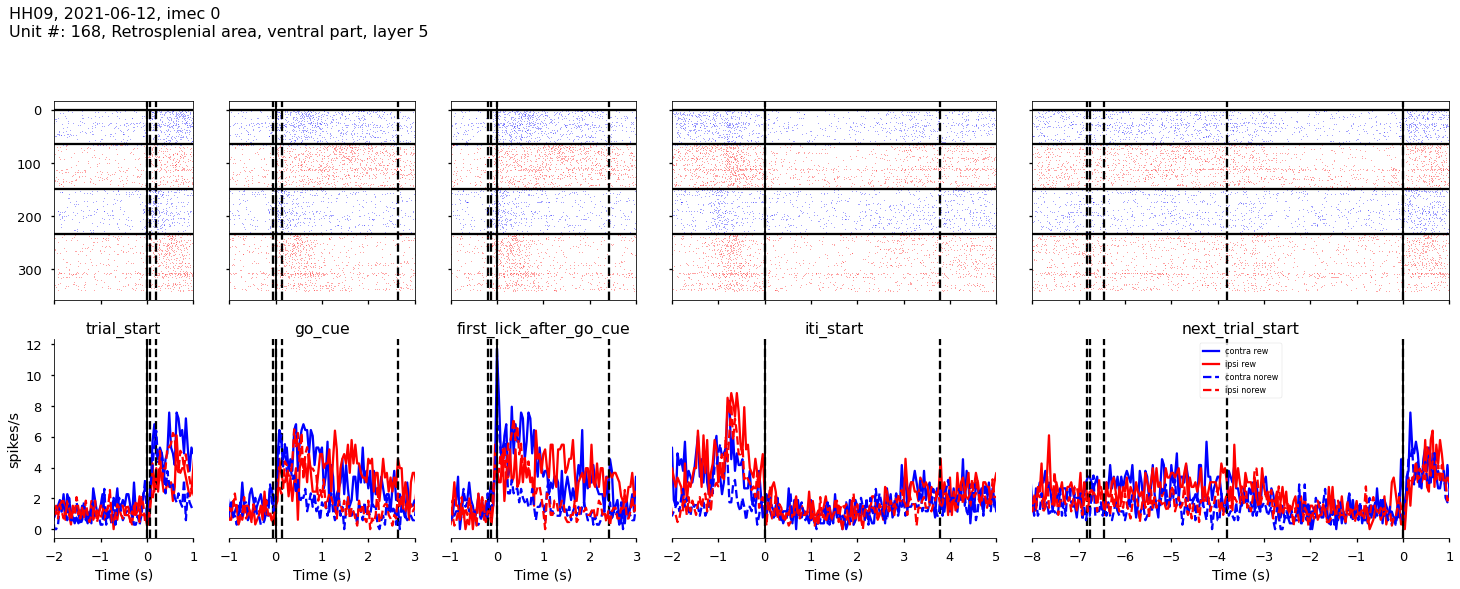

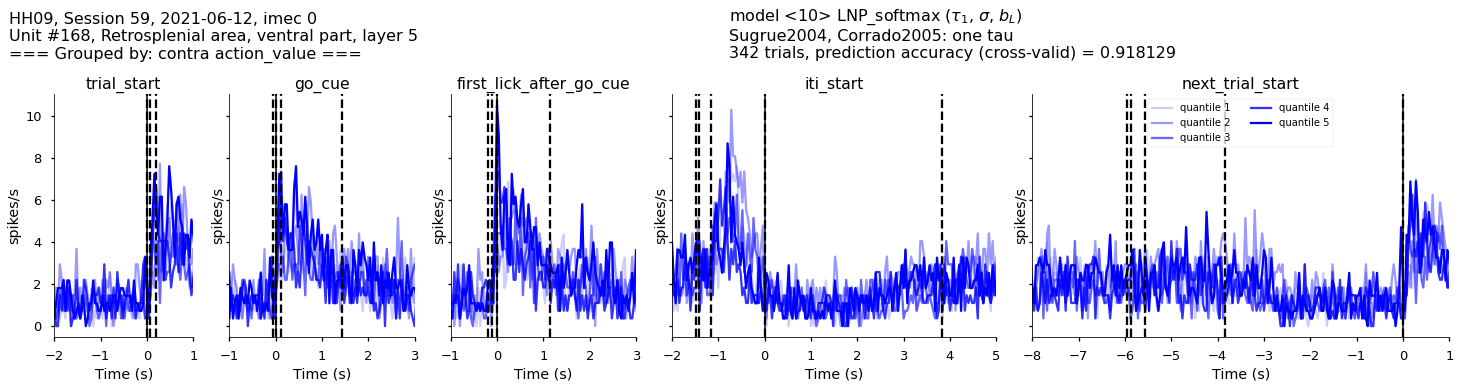

In [22]:
date, imec, unit = '2021-06-12', 0, 168
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

#### OFC

In [ ]:
date, imec, unit = '2021-04-29', 0, 299
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=10)

# Unit selectivity 

## Preparation

In [6]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

Neural activity per trial (given unit, period)

In [7]:
from pipeline.psth_foraging import compute_unit_period_activity
from pipeline.util import _get_unit_independent_variable
from pipeline.plot.foraging_model_plot import plot_session_fitted_choice
from pipeline.plot.unit_psth import plot_unit_period_tuning

In [8]:
period_activity = compute_unit_period_activity(unit_key, 'iti_all')

Relative value of best model per trial

In [9]:
best_model = (foraging_model.FittedSessionModelComparison.BestModel & unit_key & 'model_comparison_idx=0').fetch1('best_aic')
lv = _get_unit_independent_variable(unit_key, model_id=best_model)

In [12]:
trial, relative_value, left_value, right_value, rpe = lv.trial, lv.relative_action_value_ic, lv.left_action_value, lv.right_action_value, lv.rpe
firing = period_activity['firing_rates'][trial-1]

(<Figure size 2200x2800 with 5 Axes>, <Figure size 1560x1072.5 with 3 Axes>)

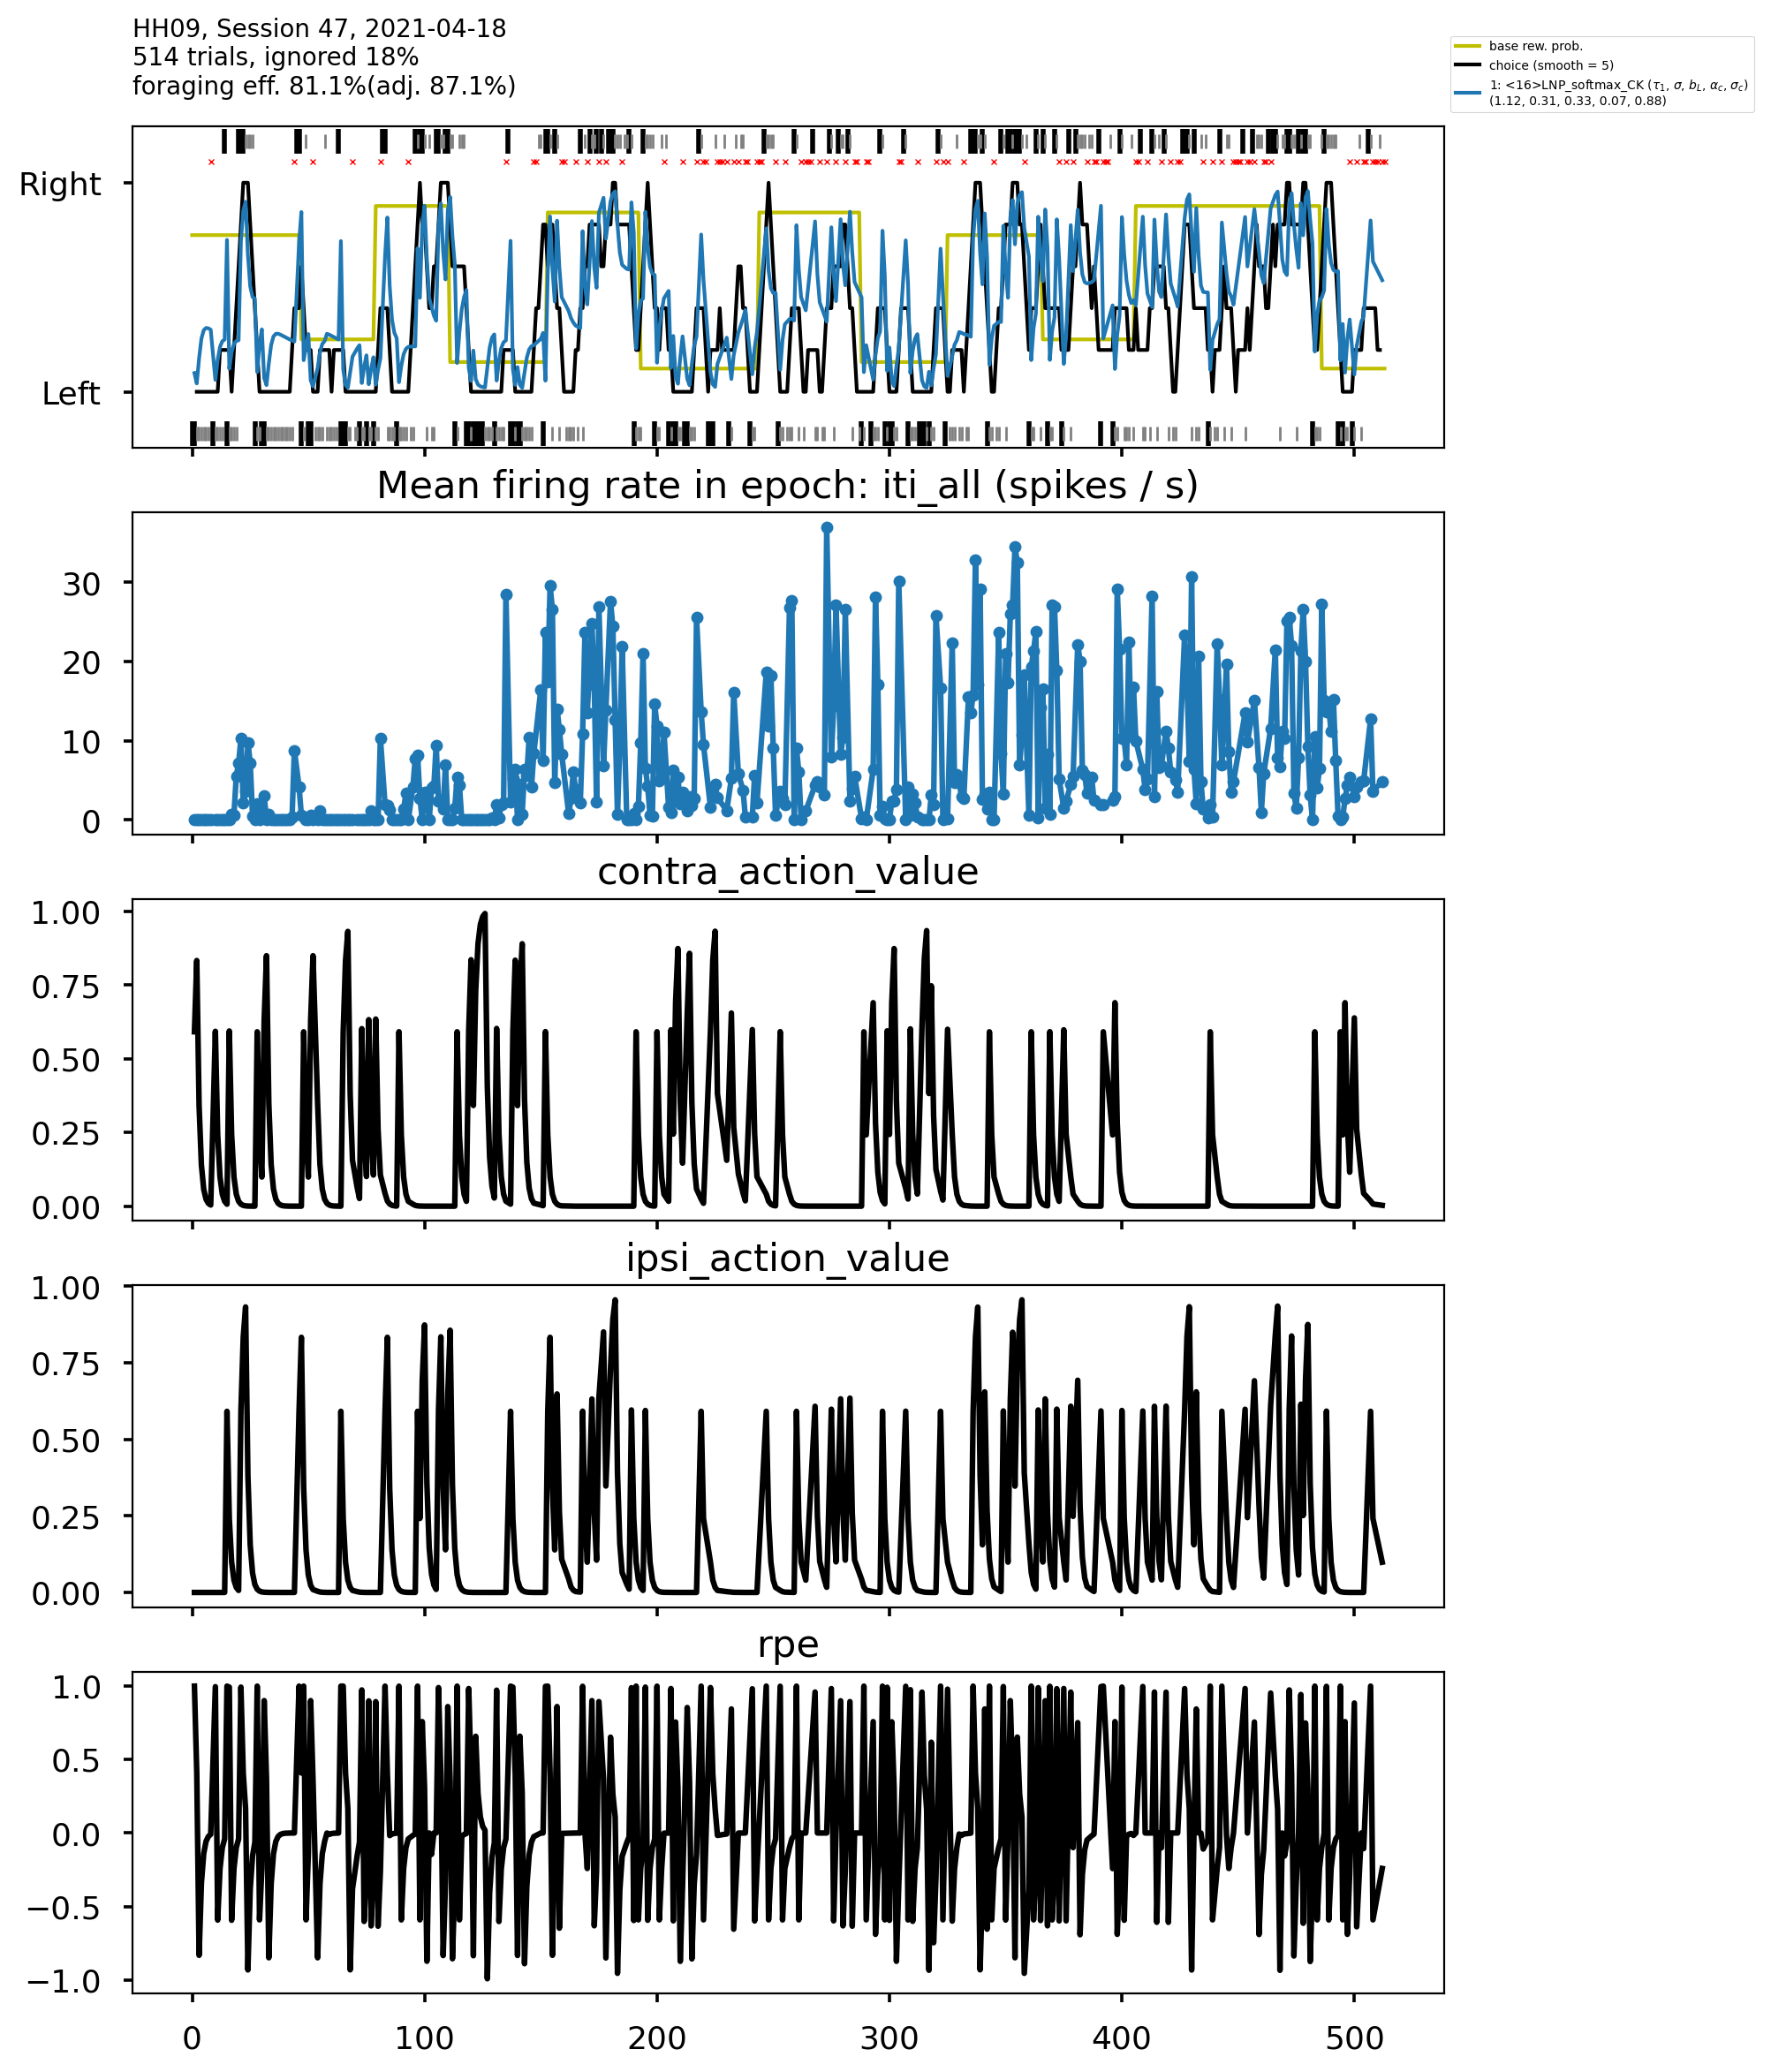

<Figure size 1600x600 with 0 Axes>

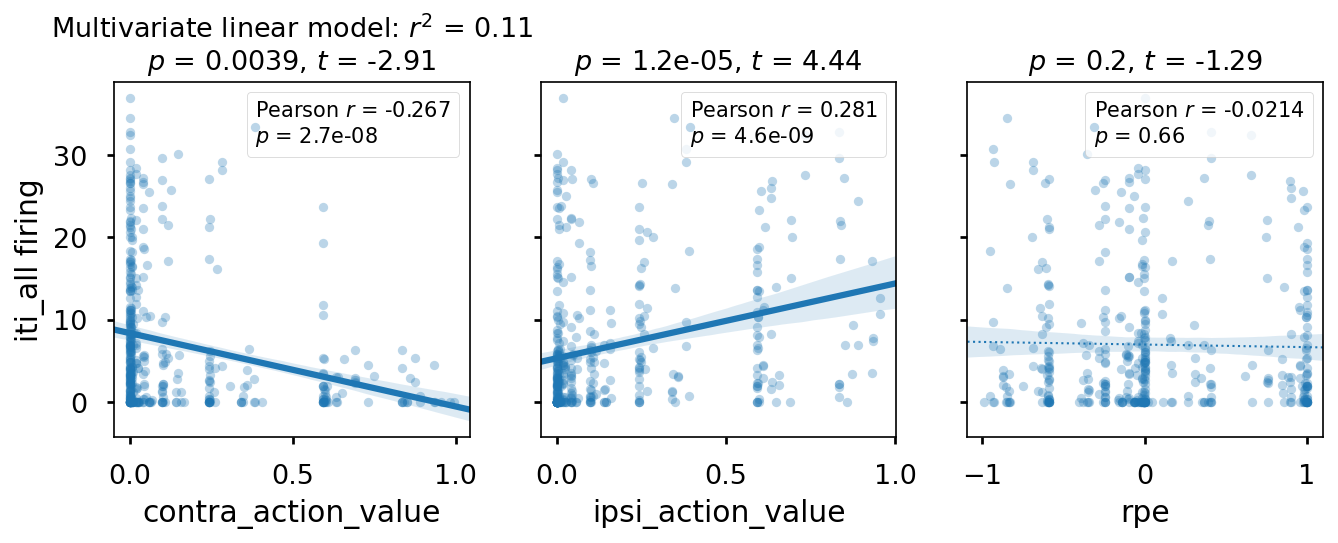

In [11]:
plot_unit_period_tuning()

<AxesSubplot:>

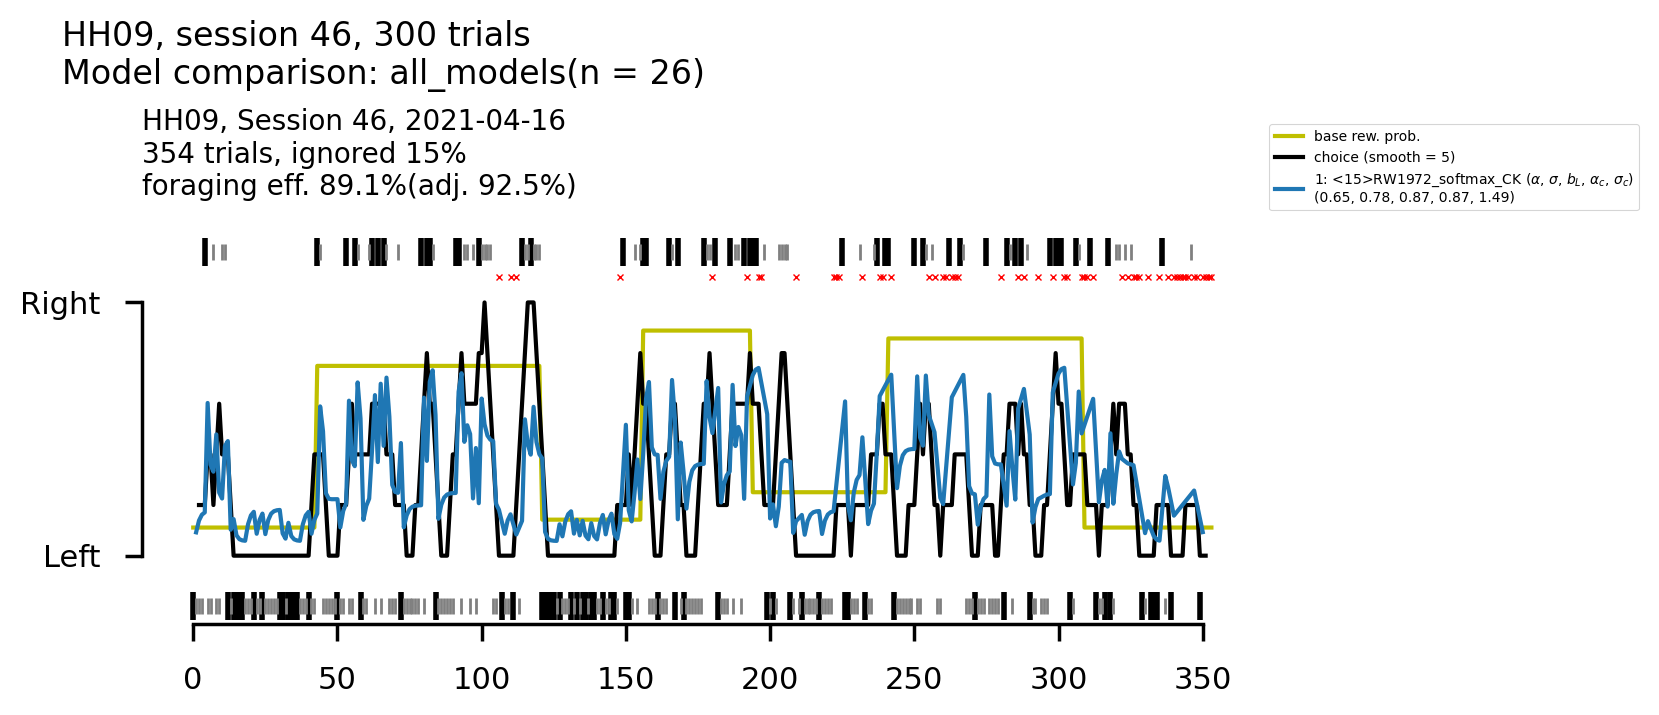

In [13]:
unit_key = {'subject_id': 473361, 'session': 46}
plot_session_fitted_choice(unit_key, remove_ignored=False)

### Behavior

In [ ]:
from pipeline.plot.foraging_plot import plot_foragingWebGUI_session
plot_foragingWebGUI_session('HH09', 47)

### Populate linear model fitting

In [ ]:
schema = dj.schema(get_schema_name('psth_foraging'))
schema.jobs

In [ ]:
schema.jobs.fetch('key', 'host')

In [ ]:
schema.jobs.delete()

In [ ]:
finished = len(psth_foraging.UnitPeriodLinearFit())
total = len(psth_foraging.UnitPeriodLinearFit.key_source)
print(f'Fitted session: {finished}/{total}, {finished/total:.3%}')

###  Validate

In [ ]:
date, imec, unit = '2021-04-18', 0, 541
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")

_ = unit_psth.plot_unit_psth_choice_outcome(unit_key)
_ = unit_psth.plot_unit_psth_latent_variable_quantile(unit_key, model_id=5)
plot_unit_period_tuning(unit_key)

In [ ]:
(psth_foraging.UnitPeriodLinearFit * psth_foraging.UnitPeriodLinearFit.Param) & unit_key

## Example cells

In [16]:
from pipeline.plot.unit_characteristic_plot import *
dj.conn().connect()

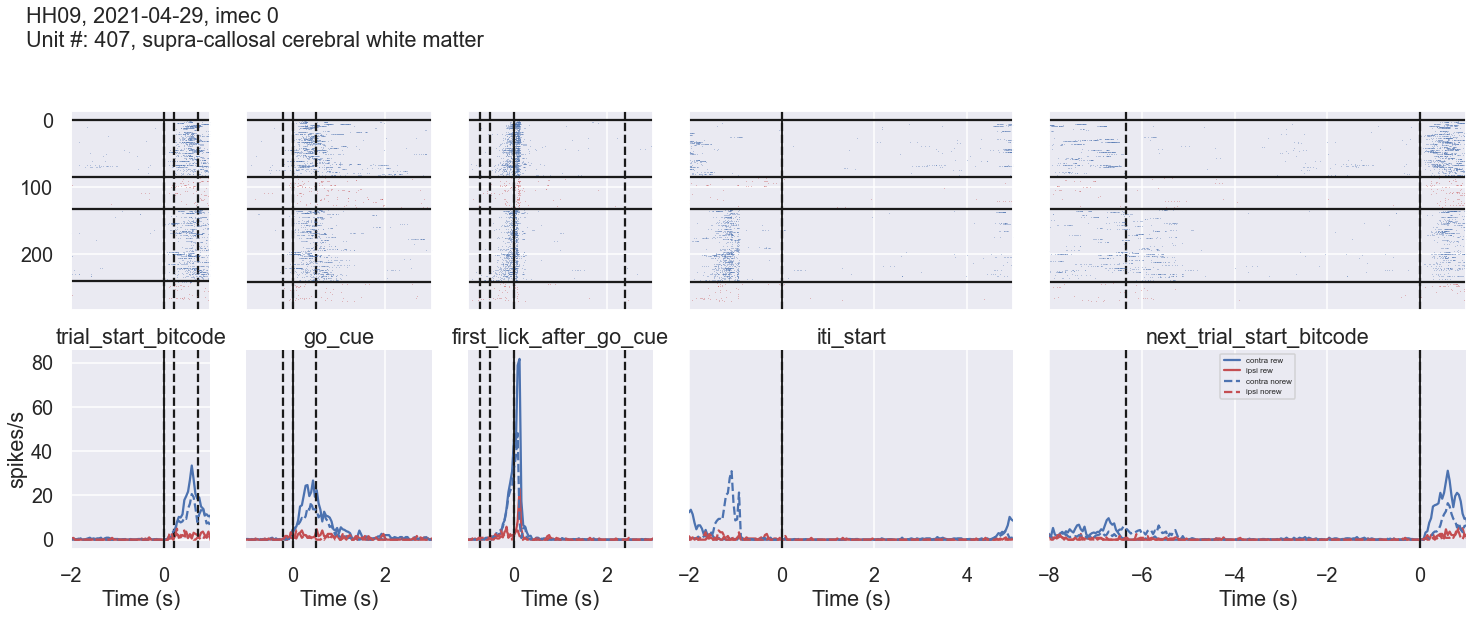

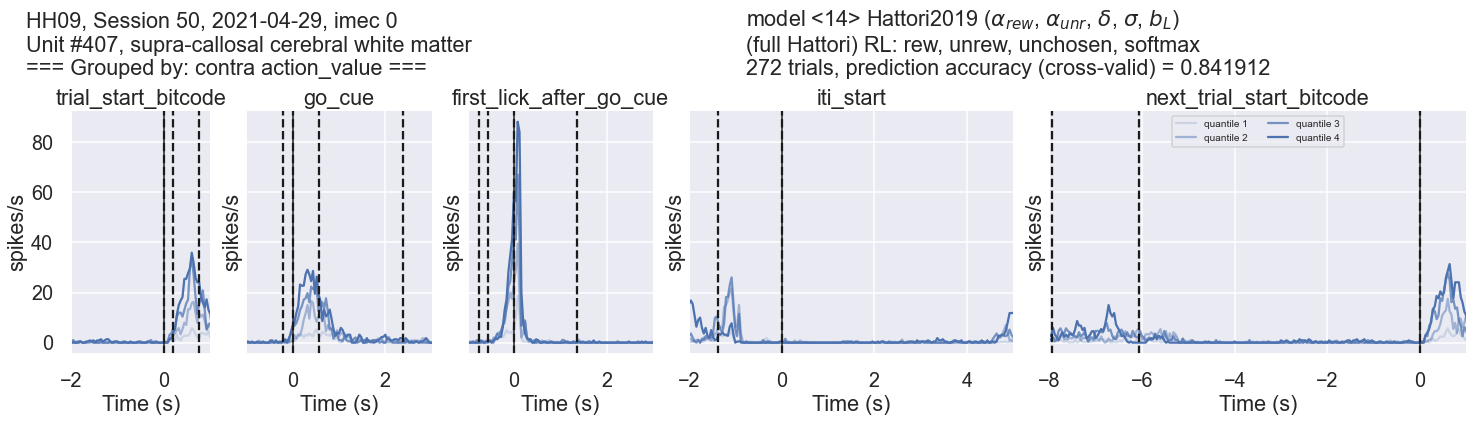

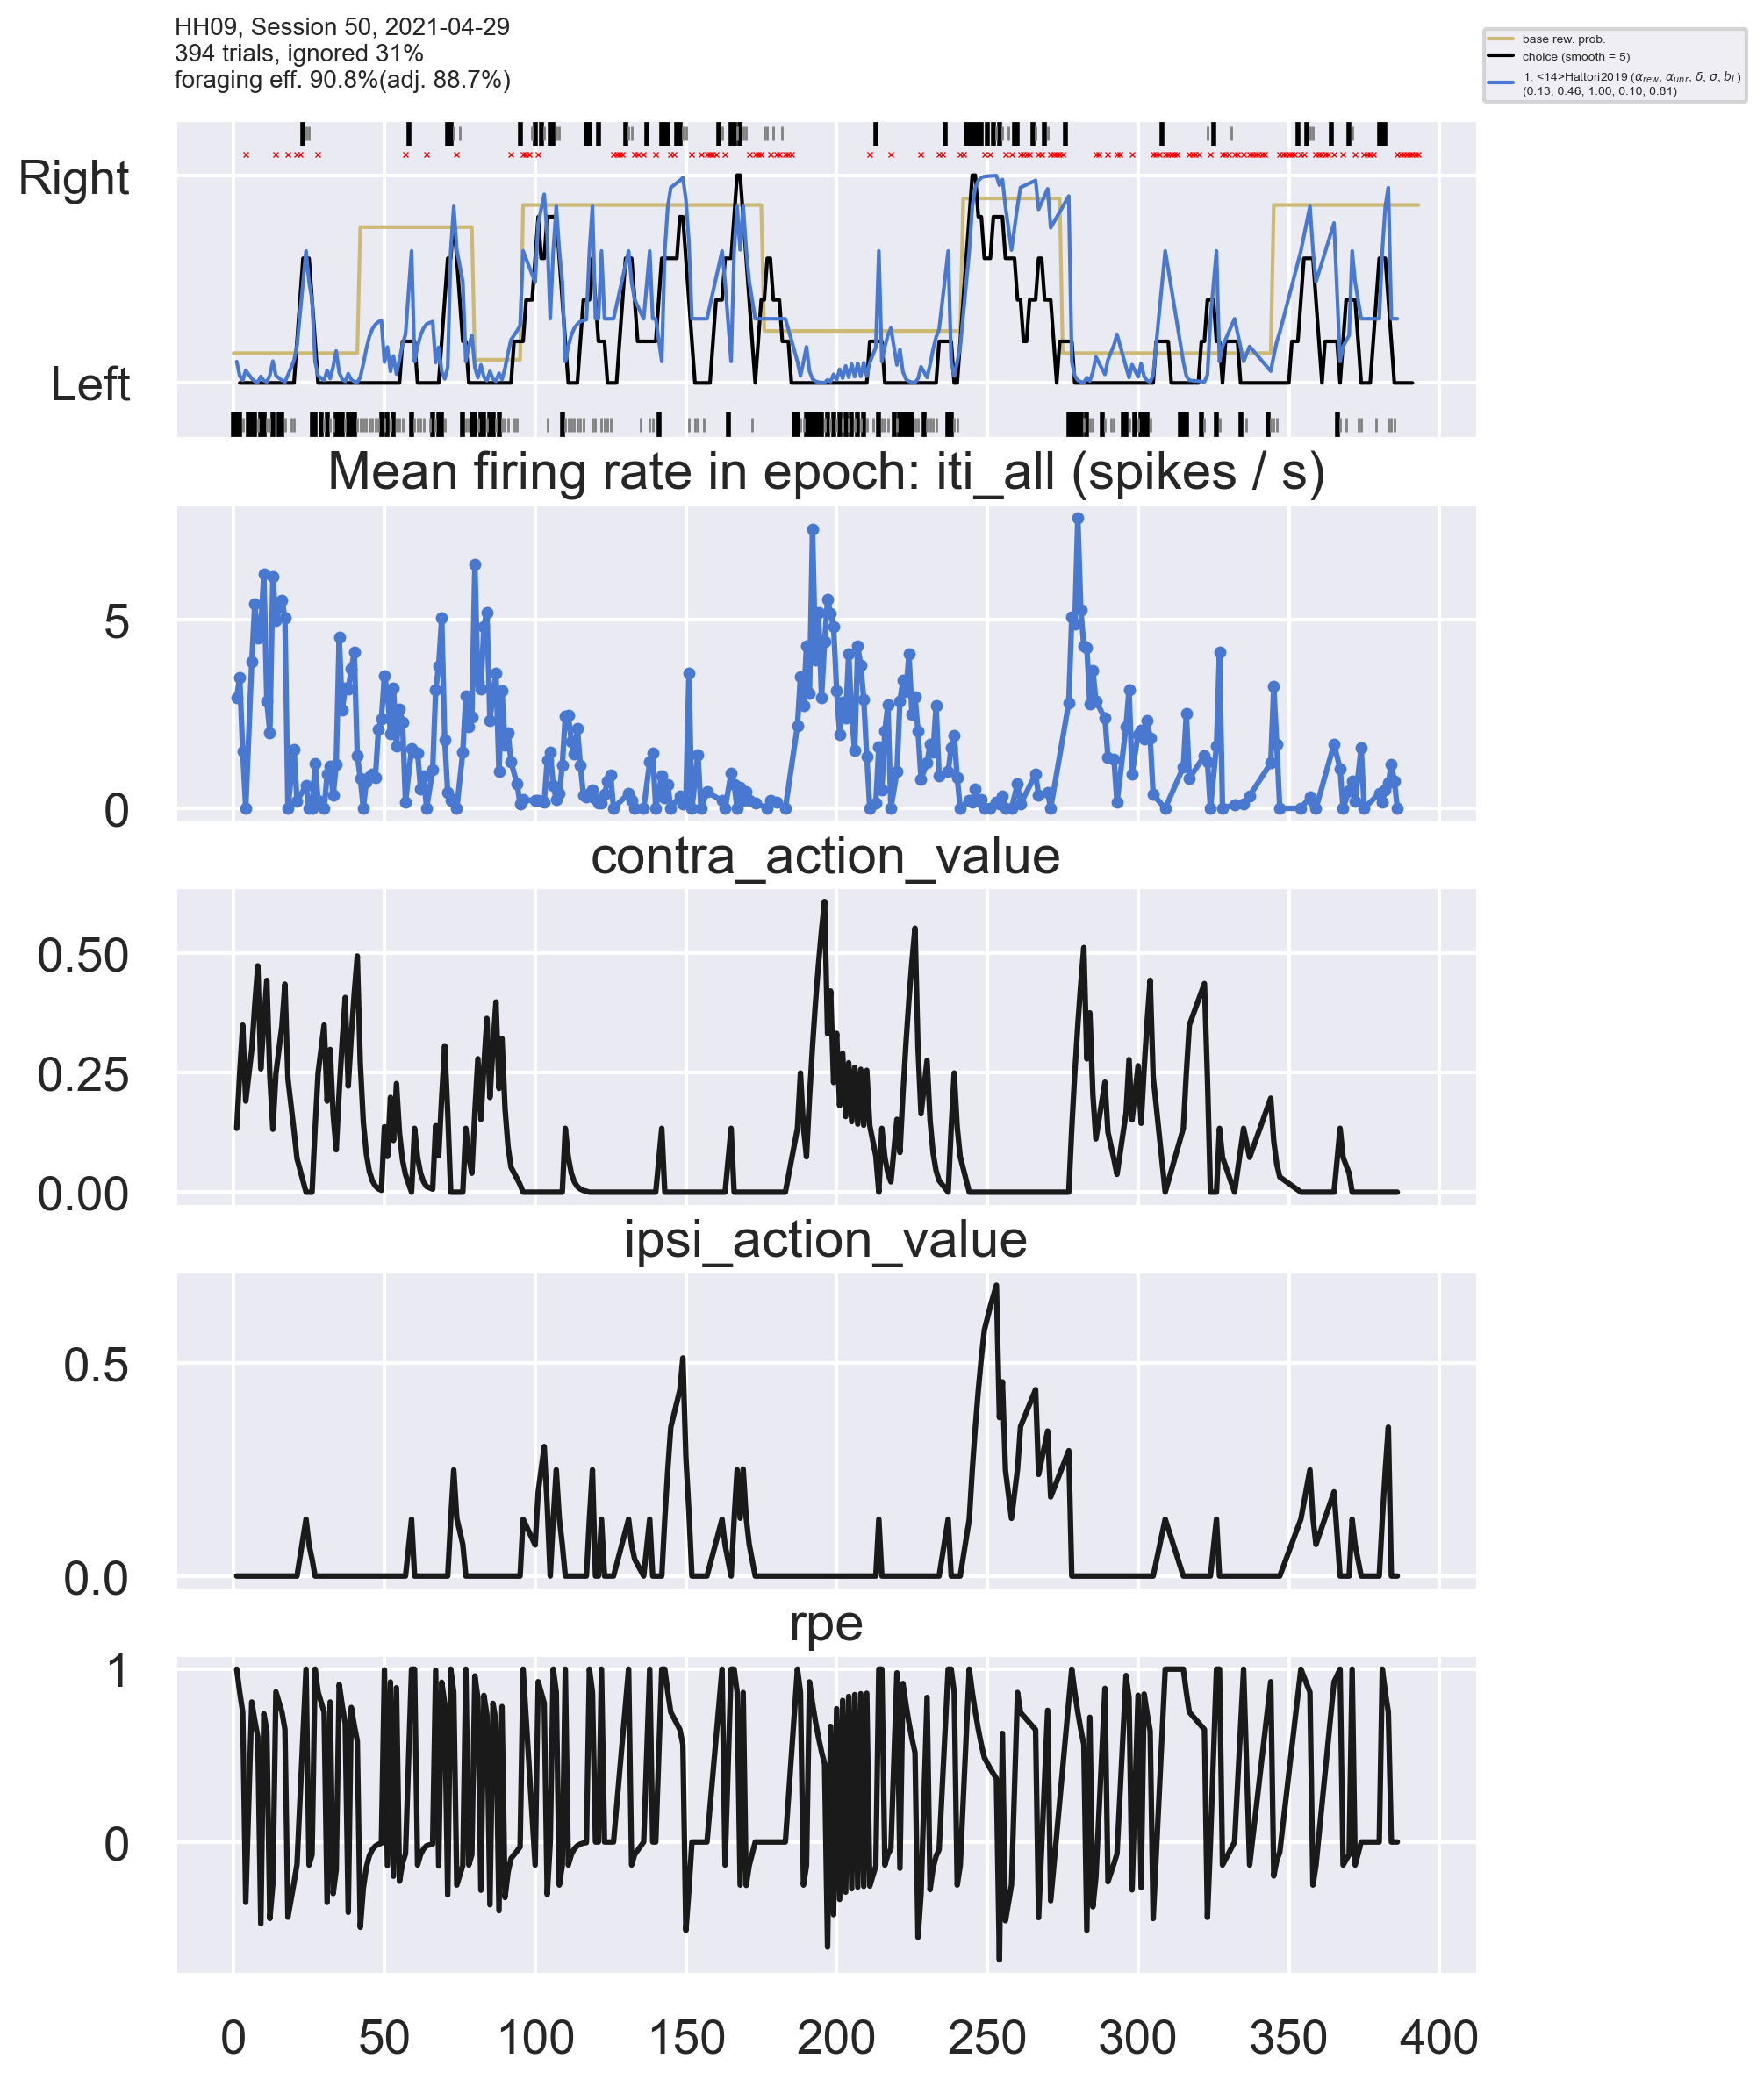

<Figure size 1600x600 with 0 Axes>

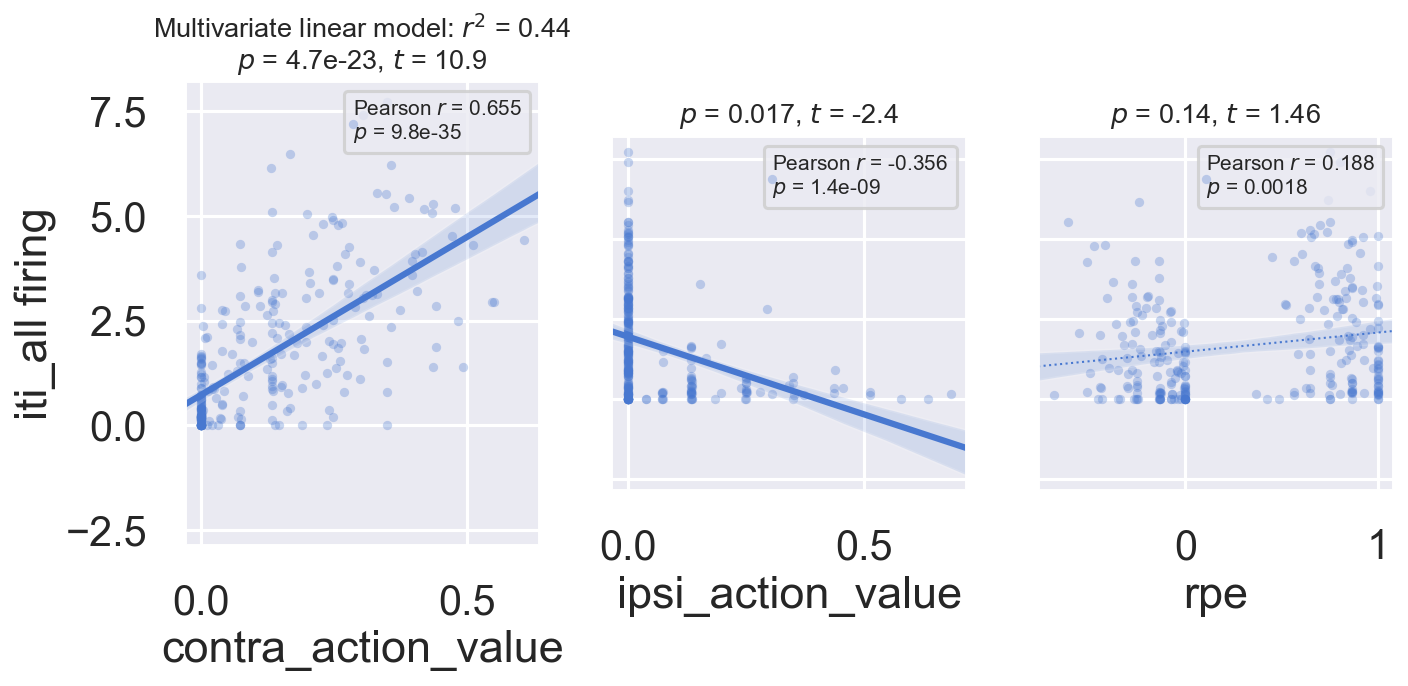

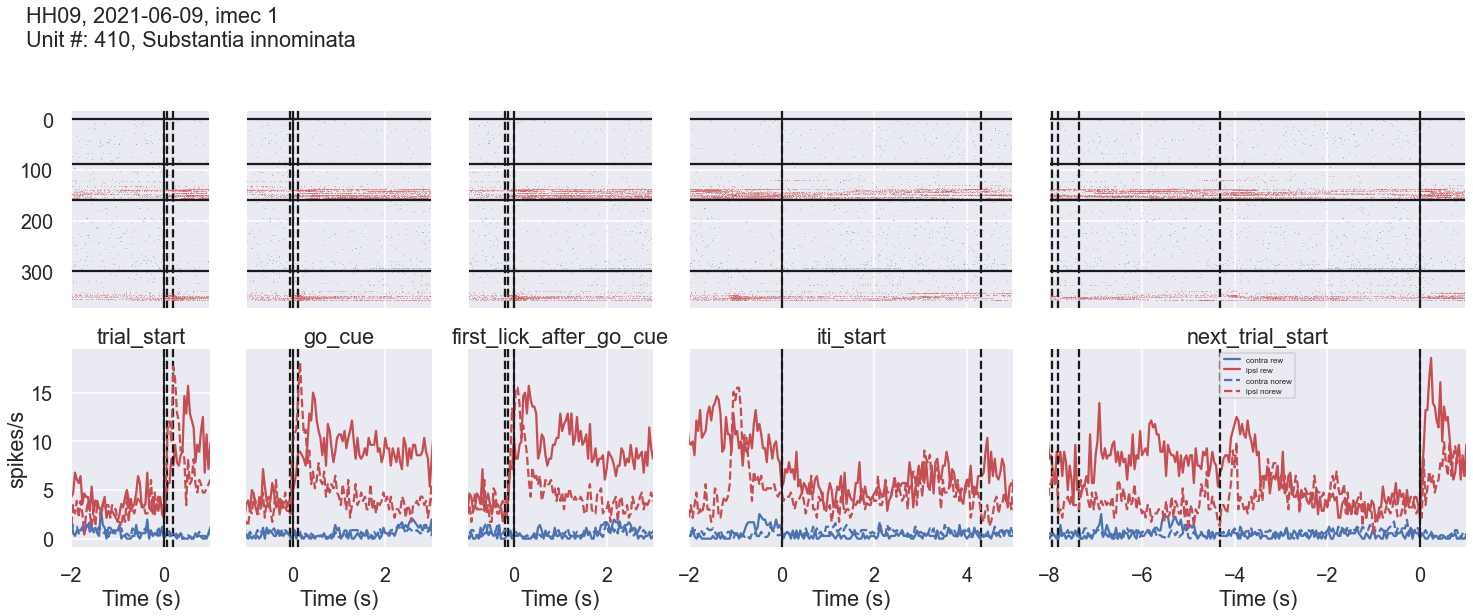

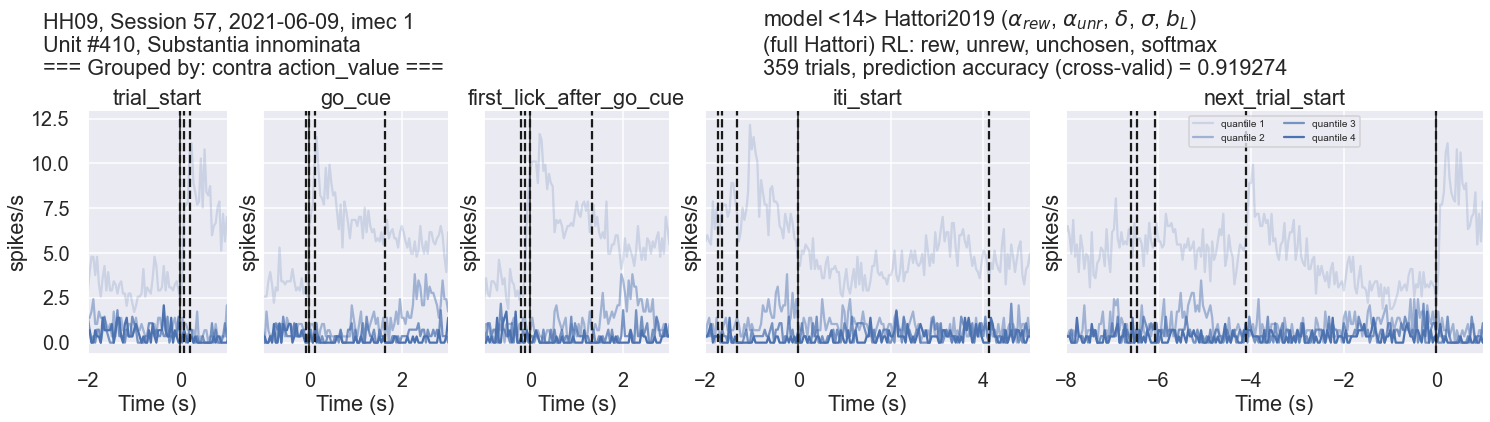

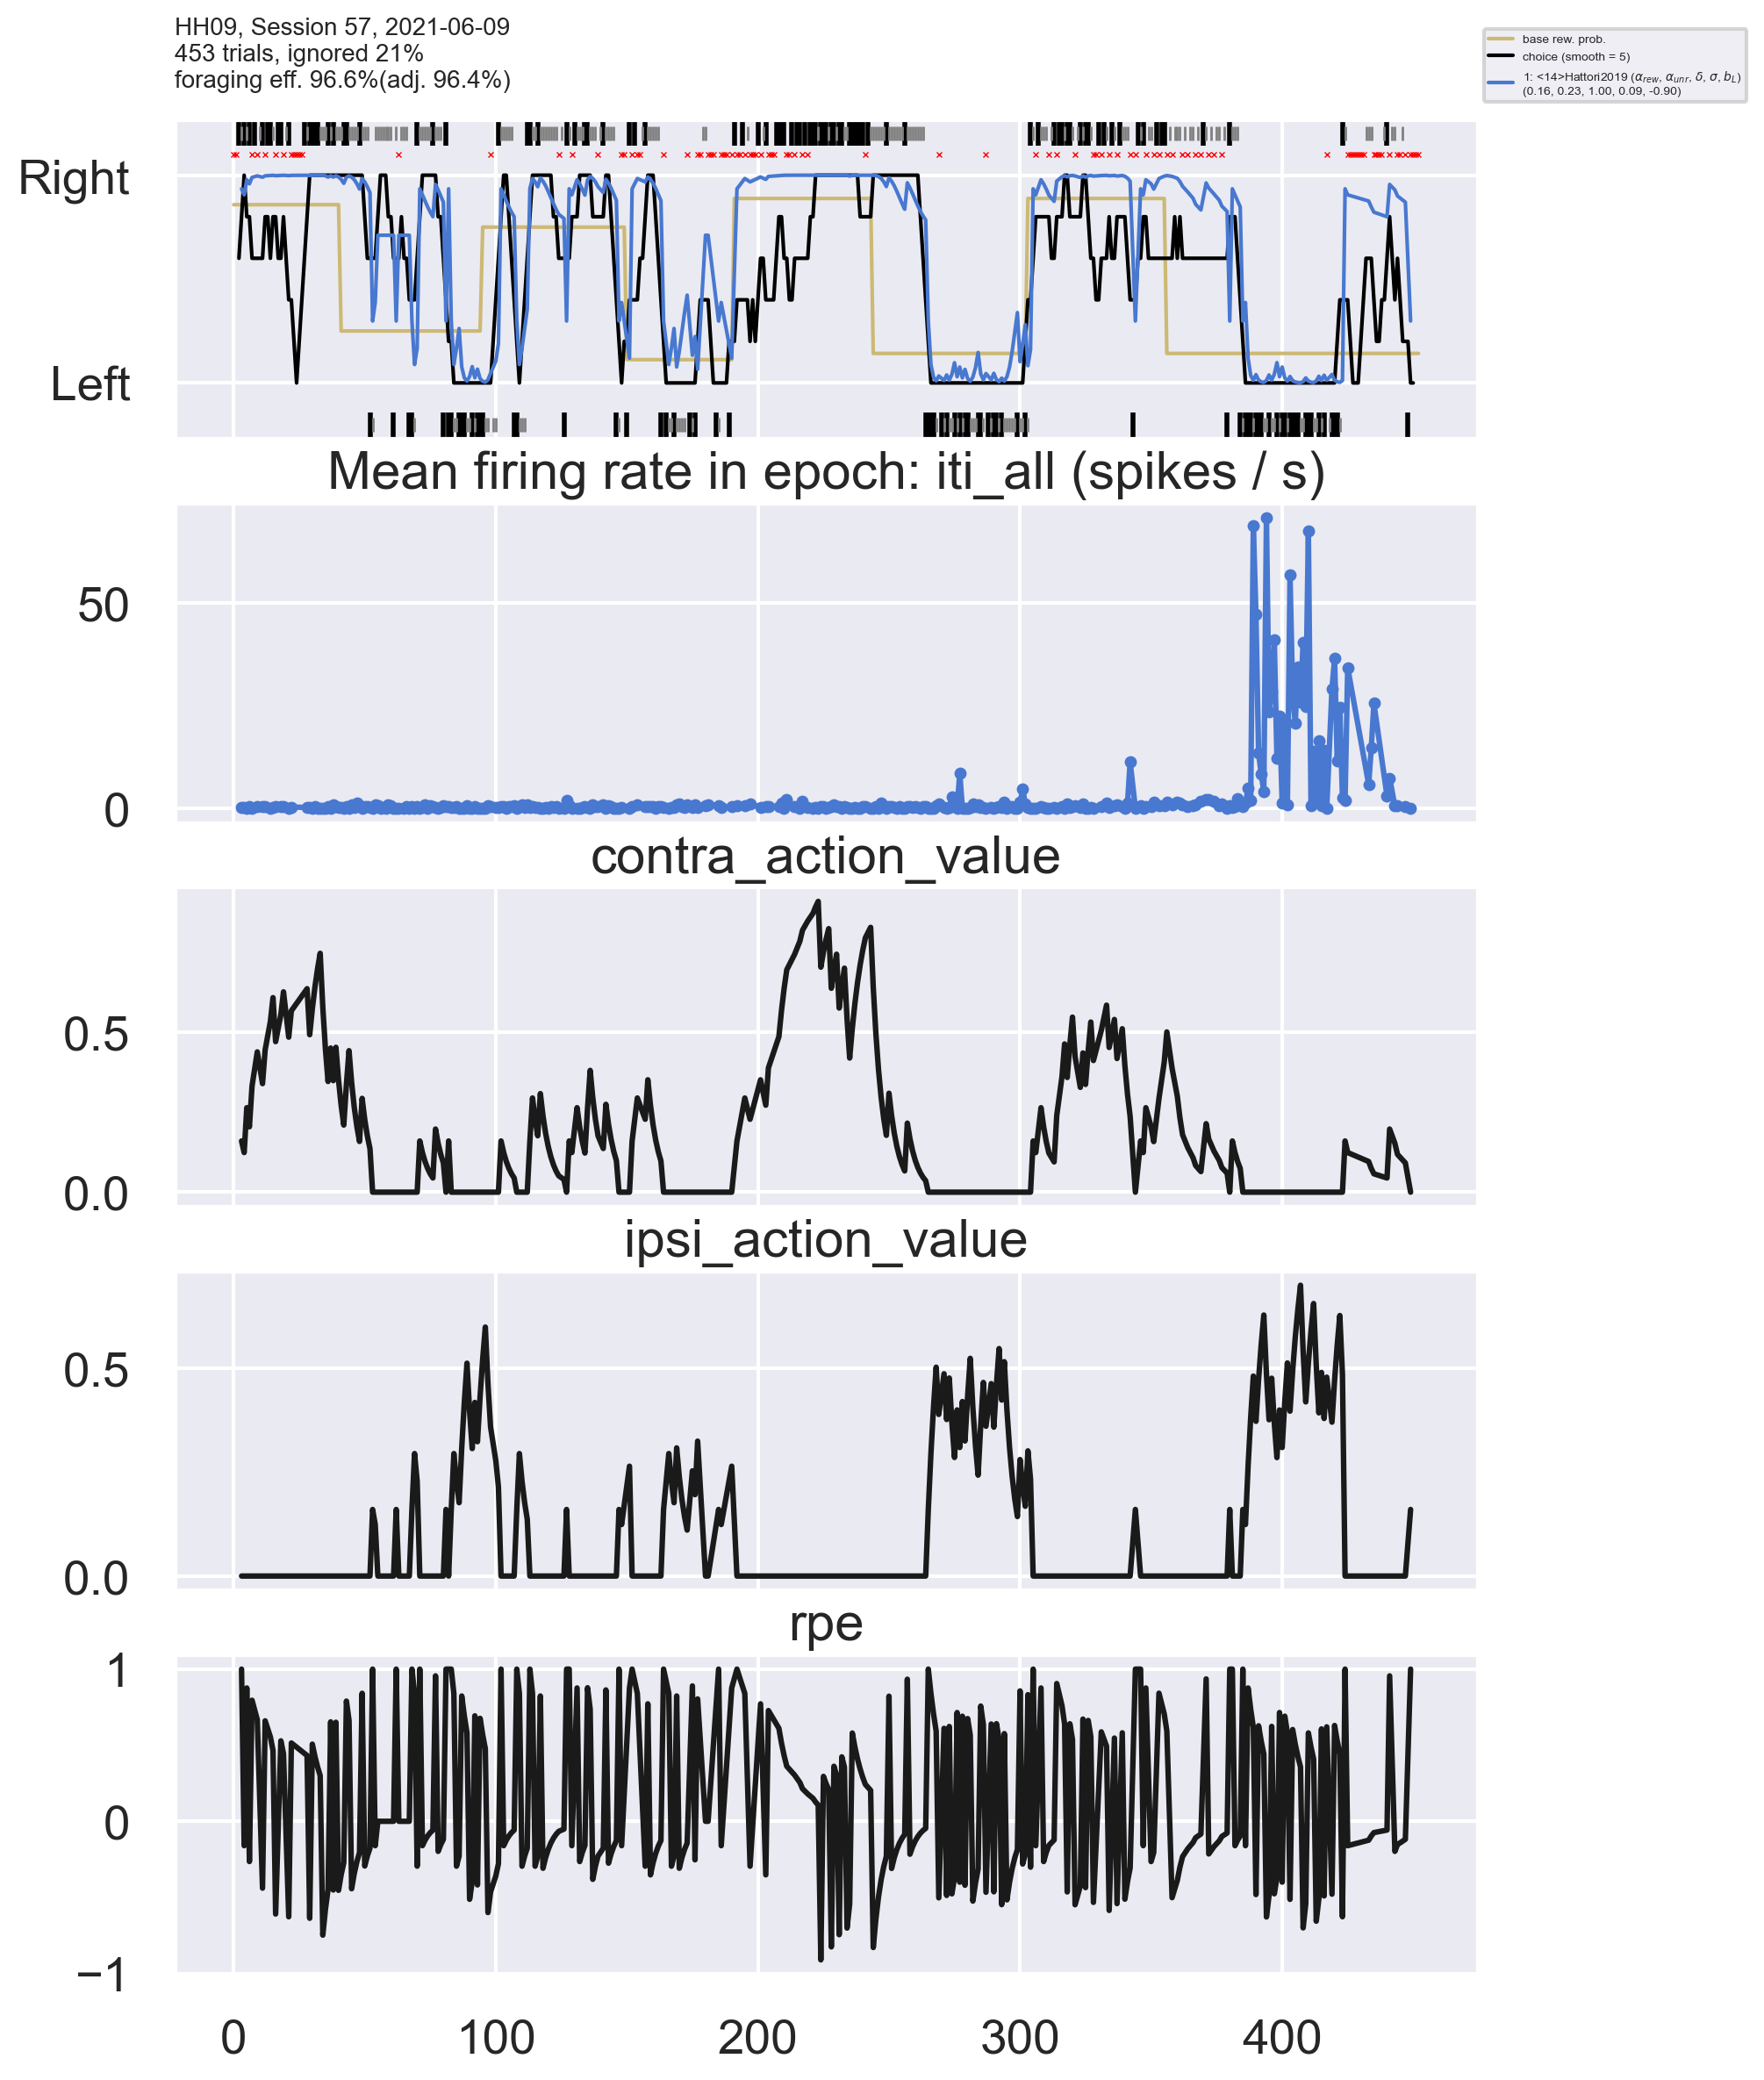

<Figure size 1600x600 with 0 Axes>

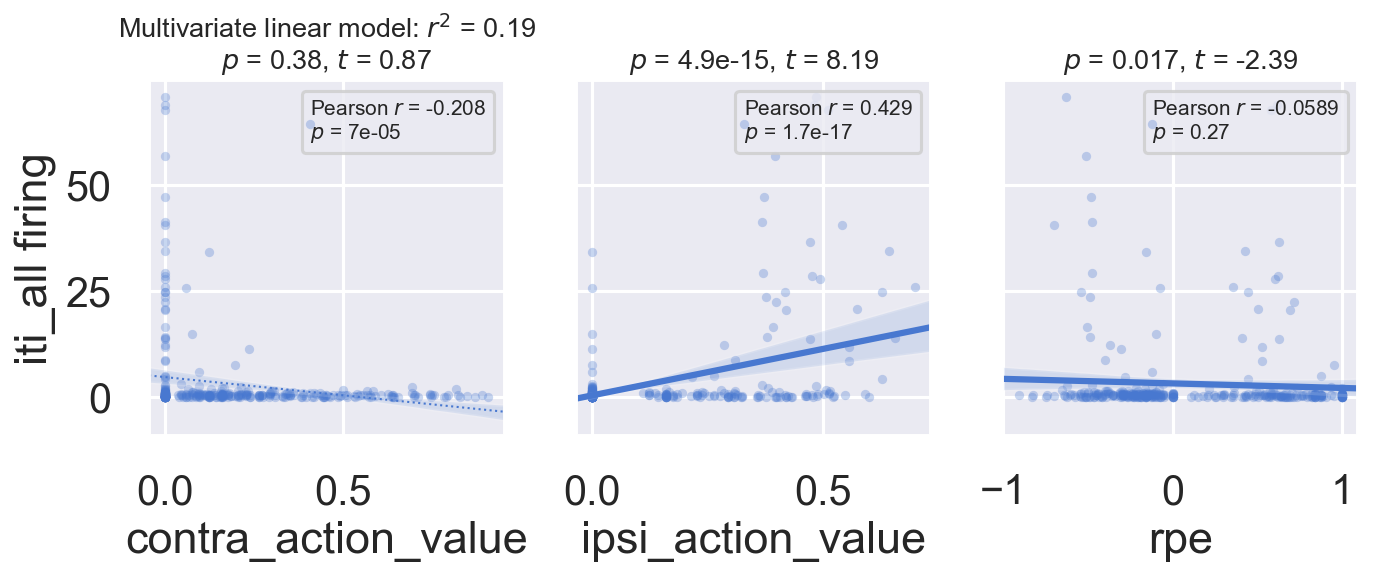

In [17]:
plot_example_cells(best_n=2, 
                   sort_lv = 'relative_action_value_ic', 
                   sort_ep = 'iti_all',
                   linear_model='Q_rel + Q_tot + rpe')

#  Trial num bug

In [ ]:
from pipeline.plot.unit_psth import plot_unit_period_tuning
from pipeline.plot.foraging_model_plot import plot_session_fitted_choice

In [ ]:
date, imec, unit = '2021-04-16', 0, 978
unit_key = (ephys.Unit() * experiment.Session & {'session_date': date, 'subject_id': 473361, 'insertion_number':imec + 1, 'unit_uid': unit}).fetch1("KEY")
plot_unit_period_tuning(unit_key)

In [ ]:
from pipeline.ingest.util import compare_ni_and_bpod_times
compare_ni_and_bpod_times({'subject_id': 473361, 'session': 46}, event_to_align='go', legend=True)